# **ETL Data Project 3**

In [1]:
#instalamos las librerias 
!pip install reverse_geocoder

     |████████████████████████████████| 2.2 MB 4.2 MB/s 
  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268088 sha256=5ccf816a7b96b51e9e51c0f9fae2c33b4384fcb6d9cb7bcc484fa4d122525626
  Stored in directory: /root/.cache/pip/wheels/34/6e/70/5423639428a2cac8ea7eb467214a4254b549b381f306a9c790
Successfully built reverse-geocoder
ERROR: Could not find a version that satisfies the requirement dateutil.relativedelta (from versions: none)
ERROR: No matching distribution found for dateutil.relativedelta


In [2]:
# importing necessary libraries
import reverse_geocoder as rg
import pprint
import pandas as pd
from datetime import date
from datetime import datetime
from pandas._libs.tslibs import dtypes
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

## **Train datos demográficos**

In [160]:
#import csv
demo_train= pd.read_csv('/content/train_datos_demograficos.csv')
demo_train.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


### **Tipos de datos**

In [161]:
demo_train.dtypes

customerid                     object
birthdate                      object
bank_account_type              object
longitude_gps                 float64
latitude_gps                  float64
bank_name_clients              object
bank_branch_clients            object
employment_status_clients      object
level_of_education_clients     object
dtype: object

In [162]:
#Modificamos 'birthdate' para que sea una fecha
demo_train['birthdate']=pd.to_datetime(demo_train['birthdate'])
demo_train.dtypes

customerid                            object
birthdate                     datetime64[ns]
bank_account_type                     object
longitude_gps                        float64
latitude_gps                         float64
bank_name_clients                     object
bank_branch_clients                   object
employment_status_clients             object
level_of_education_clients            object
dtype: object

### **Edición de variables**

#### **Añadimos variables transformadas**

**EDAD**

In [163]:
from dateutil.relativedelta import relativedelta

In [164]:
demo_train.insert(9, 'age', '')

for i in demo_train.index:
  today = datetime.today()
  born = demo_train['birthdate'][i]
  edad = today.year - born.year
  demo_train['age'][i]= edad

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [146]:
demo_train.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,49
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,36
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,35
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,31
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN,40


**ESTADO**

In [147]:
demo_train.insert(10, 'state', '')

# Obtenemos la ciudad de las coordenadas "long y lat"
for i in demo_train.index:
  coordinates =(demo_train['latitude_gps'][i], demo_train['longitude_gps'][i])
  localizacion = rg.search(coordinates)[0]['admin1']
  
#incluimios los datos en la columna creada anteriormente 
  demo_train['state'][i] = localizacion

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [148]:
demo_train.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,age,state
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN,49,Lagos
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN,36,Ogun
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN,35,Delta
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN,31,Lagos
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN,40,Kano


#### **Eliminamos variables innecesarias**

In [165]:
print(demo_train.isnull().sum())

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
age                              0
dtype: int64


In [166]:
del demo_train['longitude_gps'] #usada para identificar el estado
del demo_train['latitude_gps'] #usada para identificar el estado
del demo_train['birthdate'] #usada para sacar la edad
del demo_train['bank_branch_clients'] #98.8% NaN
del demo_train['level_of_education_clients'] #86.5% NaN

In [167]:
demo_train.head()

,customerid,bank_account_type,bank_name_clients,employment_status_clients,age
0,8a858e135cb22031015cbafc76964ebd,Savings,GT Bank,NaN,49
1,8a858e275c7ea5ec015c82482d7c3996,Savings,Sterling Bank,Permanent,36
2,8a858e5b5bd99460015bdc95cd485634,Savings,Fidelity Bank,NaN,35
3,8a858efd5ca70688015cabd1f1e94b55,Savings,GT Bank,Permanent,31
4,8a858e785acd3412015acd48f4920d04,Savings,GT Bank,Permanent,40


In [168]:
print(demo_train.isnull().sum())

customerid                     0
bank_account_type              0
bank_name_clients              0
employment_status_clients    648
age                            0
dtype: int64


#### **Visualización y agrupación de variables**

**EMPLOYMENT STATUS**

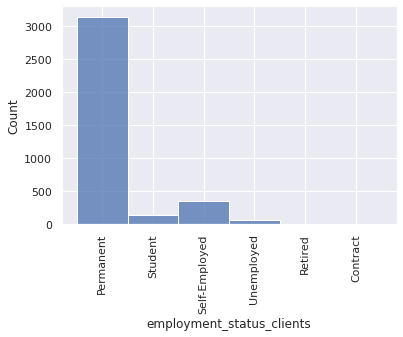

In [120]:
sns.histplot(data = demo_train, x = "employment_status_clients")
plt.xticks(rotation = 'vertical')
plt.show()

In [121]:
#unimos todos menos permanent. ¿Convertirla en boolean? Directamente descartarla?? es un 90-10

demo_train['employment_status_clients'] = demo_train["employment_status_clients"].map({'Permanent':'Permanent','Student':'Other', 'Self-Employed': 'Other',
                                                                                       'Unemployed': 'Other', 'Retired': 'Other','Contract': 'Other'})

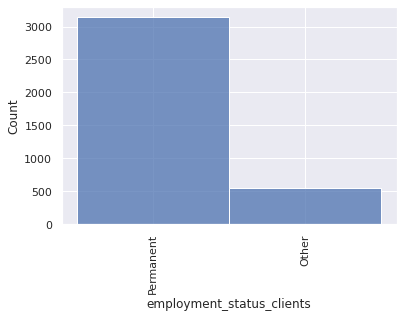

In [122]:
sns.histplot(data = demo_train, x = "employment_status_clients")
plt.xticks(rotation = 'vertical')
plt.show()

In [123]:
demo_train['employment_status_clients'].isnull().sum()
#Como tenemos muchos valores nulos, seria rellenarlos en función de la distribución de la variable en el dataset, pero no se si nos quedaremos con esta o que

648

**BANK NAME**

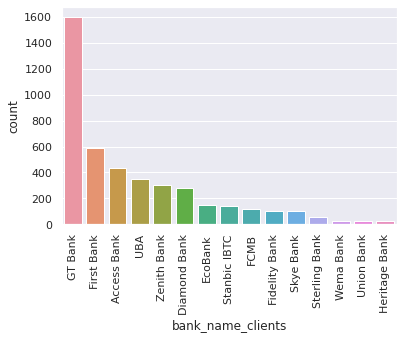

In [124]:
sns.countplot(data = demo_train, x = "bank_name_clients", order=demo_train.bank_name_clients.value_counts().iloc[:15].index)
plt.xticks(rotation = 'vertical')
plt.show() #vemos unicamente los 15 primeros más frecuentes

In [125]:
#Generamos dos grupos a parte del GT Bank buscando la característica en común para poder agruparlos.

demo_train['bank_name_clients'] = demo_train["bank_name_clients"].map({'GT Bank':'GT Bank', 'Fidelity Bank':'National Banks',
                                                                       'Heritage Bank':'National Banks','Sterling Bank':'National Banks',
                                                                       'Union Bank':'National Banks','Unity Bank':'National Banks',
                                                                       'Wema Bank':'National Banks','Keystone Bank':'National Banks',
                                                                       'Access Bank':'Multinational Banks','Diamond Bank':'Multinational Banks',
                                                                       'EcoBank':'Multinational Banks','FCMB':'Multinational Banks',
                                                                       'First Bank':'Multinational Banks','Skye Bank':'Multinational Banks',
                                                                       'Stanbic IBTC':'Multinational Banks','Standard':'Multinational Banks',
                                                                       'UBA':'Multinational Banks','Zenith Bank':'Multinational Banks',})

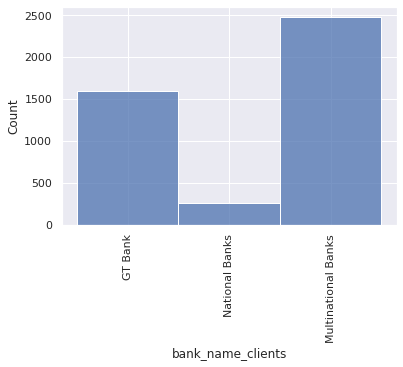

In [126]:
sns.histplot(data = demo_train, x = "bank_name_clients")
plt.xticks(rotation = 'vertical')
plt.show()

In [127]:
demo_train.groupby('bank_name_clients').count() #Quitar los national banks????????????

,customerid,bank_account_type,employment_status_clients,age,state
bank_name_clients,,,,,
GT Bank,1598,1598,1347,1598,1598
Multinational Banks,2476,2476,2113,2476,2476
National Banks,257,257,223,257,257


**BANK ACCOUNT TYPE**

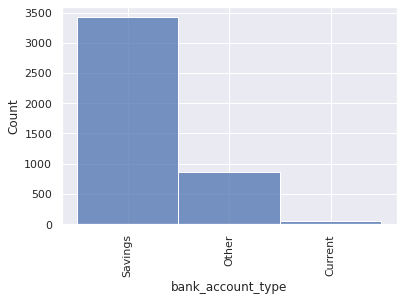

In [128]:
sns.histplot(data = demo_train, x = "bank_account_type")
plt.xticks(rotation = 'vertical')
plt.show()

In [129]:
#Metemos current en other
demo_train['bank_account_type'] = demo_train["bank_account_type"].map({'Savings':'Savings','Other':'Other', 'Current': 'Other'})

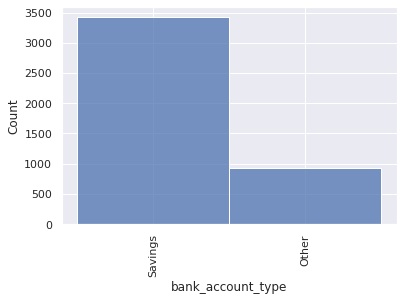

In [130]:
sns.histplot(data = demo_train, x = "bank_account_type")
plt.xticks(rotation = 'vertical')
plt.show()

In [131]:
demo_train.groupby('bank_account_type').count() #es un 80-20, vale la pena esta variable???

,customerid,bank_name_clients,employment_status_clients,age,state
bank_account_type,,,,,
Other,921,916,912,921,921
Savings,3425,3415,2786,3425,3425


**AGE**

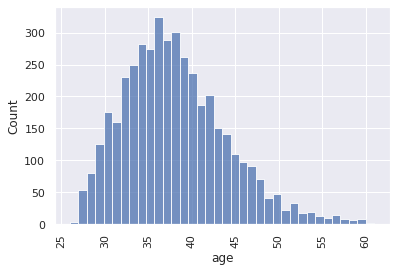

In [132]:
sns.histplot(data = demo_train, x = "age")
plt.xticks(rotation = 'vertical')
plt.show()

In [171]:
#Decidimos agrupar las edades en tres intervalos para reducir la dispersión del dataset
#26-35 años --> jóvenes adultos (independización, bodas, formación de la familia)
#36-40 años --> adultos (familia, niños, mayor recorrido laboral)
#41-61 --> adultos senior (colegio/instituo, universidades, emprendimiento, cuidado de familiares)

demo_train.insert(6, 'age_interval','1')

bins = [26, 35, 40, 61]
names = ["26-35", "36-40", "41-61"]

demo_train['age_interval'] = pd.cut(demo_train['age'], bins, labels = names)

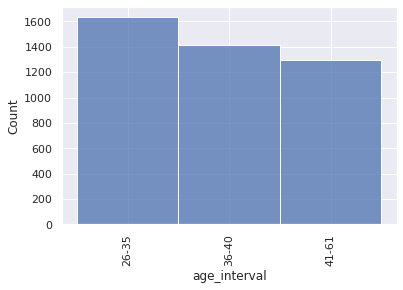

In [173]:
sns.histplot(data = demo_train, x = "age_interval")
plt.xticks(rotation = 'vertical')
plt.show()

**STATE**

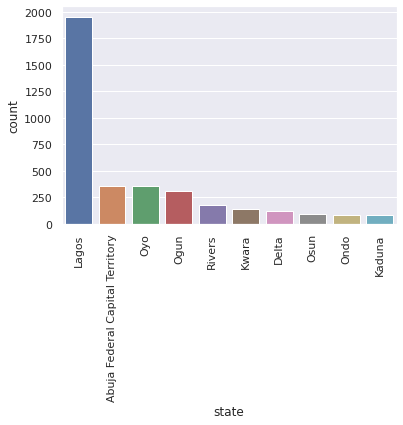

In [135]:
sns.countplot(data = demo_train, x = "state", order=demo_train.state.value_counts().iloc[:10].index)
plt.xticks(rotation = 'vertical')
plt.show()

In [136]:
#Como casi la mitad de los clientes son de Lagos, vamos a agrupar el resto de estados en una categoría que se llame 'Others'
demo_train.loc[demo_train.state!='Lagos','state']='Other'

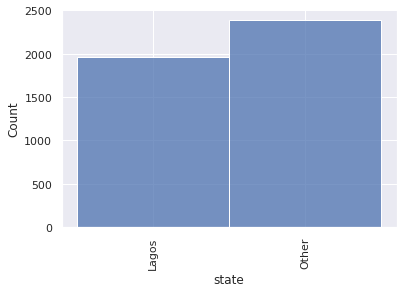

In [137]:
sns.histplot(data = demo_train, x = "state")
plt.xticks(rotation = 'vertical')
plt.show()

###**Exportar CSV modificado**

In [33]:
demo_train.to_csv('/content/test_datos_demograficos_clean.csv', index = False)

###**Añadimos variables externas**

**SALARY**

In [154]:
#insertamos los salarios por edades
demo_train.insert(7, 'salary', '')

#Incluimos datos de salario por rango de edad
#25-34 años: media 160k
#35-44 años: media 191k
#45-54 años: 177k
#55+ años: 157k

for i in demo_train.index:
  if demo_train['age'][i] < 35:
    demo_train['salary'][i] = '160000'
  if demo_train['age'][i] >= 35 and demo_train['age'][i] <= 44:
    demo_train['salary'][i] = '191000'
  if demo_train['age'][i] >=45 and demo_train['age'][i] <= 54:
    demo_train['salary'][i] = '177000'
  if demo_train['age'][i] >= 55:
    demo_train['age'][i] = '157000'

In [174]:
demo_train.to_csv('/content/train_demo_clean_salary.csv', index = False)

## **Train** **Performance**

In [34]:
#import csv
perf_train= pd.read_csv('/content/test_performance.csv')
perf_train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN


###**Tipos de datos**

In [35]:
perf_train.dtypes

customerid       object
systemloanid      int64
loannumber        int64
approveddate     object
creationdate     object
loanamount        int64
totaldue        float64
termdays          int64
referredby       object
dtype: object

In [36]:
#Pasamos las variables de fechas a datetime

perf_train['approveddate']=pd.to_datetime(perf_train['approveddate'])
perf_train['creationdate']=pd.to_datetime(perf_train['creationdate'])

perf_train.dtypes

ParserError: ignored

### **Edición de variables**

#### **Añadimos variables transformadas**




In [38]:
#Calculamos el interés restando totaldue - loanamount

perf_train.insert(9, 'interest', '')

for i in perf_train.index:
  interes = perf_train['totaldue'][i] - perf_train['loanamount'][i]
  perf_train['interest'][i]= interes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
perf_train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,interest
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good,4500.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good,2250.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good,2250.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good,1500.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good,4000.0


In [ ]:
perf_train.insert(11, 'approval_span_hours', '')

for i in perf_train.index:
  span = perf_train['approveddate'][i] - perf_train['creationdate'][i]
  perf_train['approval_span_hours'][i]= span.components.hours

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


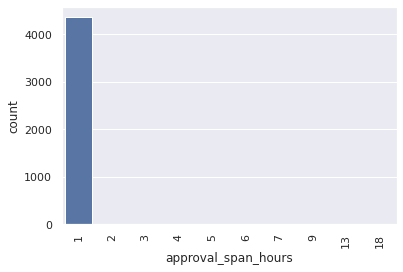

In [ ]:
sns.countplot(data = perf_train, x = "approval_span_hours")
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
#Como vemos que siempre es 1 hora, decidimos no incluir esta variable.
del perf_train['approval_span_hours']

#### **Eliminamos variables innecesarias**

In [39]:
perf_train.isnull().sum()

customerid         0
systemloanid       0
loannumber         0
approveddate       0
creationdate       0
loanamount         0
totaldue           0
termdays           0
referredby      1266
interest           0
dtype: int64

In [40]:
del perf_train['referredby'] #aprox 87% NaN
del perf_train['approveddate'] #usada para crear el approval span
del perf_train['creationdate'] #usada para crear el approval span
del perf_train['totaldue'] #usada para crear el interés

In [41]:
perf_train.head()

,customerid,systemloanid,loannumber,loanamount,termdays,interest
0,8a858899538ddb8e015390510b321f08,301998974,4,10000,30,2250.0
1,8a858959537a097401537a4e316e25f7,301963615,10,40000,30,4000.0
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,20000,30,4500.0
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,30000,30,4500.0
4,8a858e225a28c713015a30db5c48383d,301959177,4,20000,30,4500.0


#### **Visualización y agrupación de variables**

**LOAN** **NUMBER**

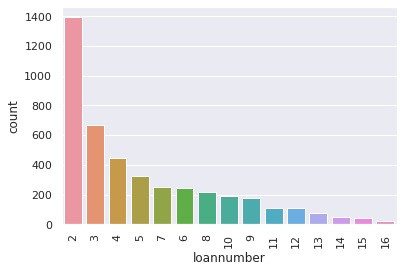

In [ ]:
sns.countplot(data = perf_train, x = "loannumber", order=perf_train.loannumber.value_counts().iloc[:15].index)
plt.xticks(rotation = 'vertical')
plt.show()
#pendiente de revisar cuando eliminemos filas a raiz de otras variables

**LOAN AMOUNT**

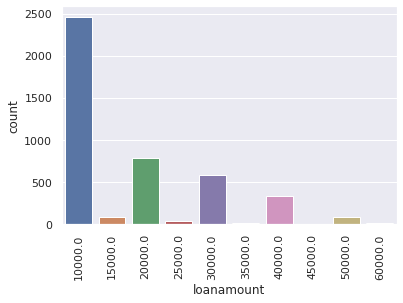

In [ ]:
sns.countplot(data = perf_train, x = "loanamount")
plt.xticks(rotation = 'vertical')
plt.show()

In [43]:
perf_train.insert(6, 'loan_interval', '1')
perf_train['loan_interval'] = perf_train['loan_interval'].astype('int64')

In [44]:
#Reagruparemos la variable en dos grupos: 10000 u.m. y más de 10000 u.m.
bins = [0, 10000, 40000]
names = ["10000", "+10000"]
perf_train['loan_interval']= pd.cut(perf_train['loanamount'], bins, labels = names)

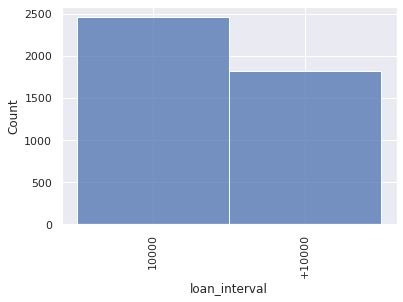

In [ ]:
sns.histplot(data = perf_train, x = "loan_interval")
plt.xticks(rotation = 'vertical')
plt.show()

**INTEREST**

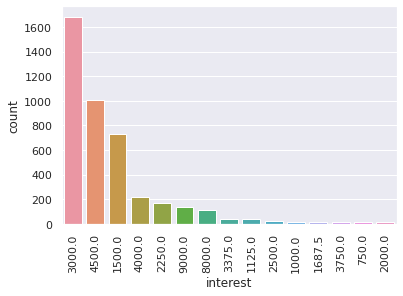

In [ ]:
sns.countplot(data = perf_train, x = "interest", order=perf_train.interest.value_counts().iloc[:15].index)
plt.xticks(rotation = 'vertical')
plt.show()

In [46]:
perf_train.insert(7, 'interest_interval', '')

for i in perf_train.index:
  if perf_train['interest'][i] < 3000:
    perf_train['interest_interval'][i] = 'menos de 3000'
  if perf_train['interest'][i] > 3000:
    perf_train['interest_interval'][i] = 'mas de 3000'
  if perf_train['interest'][i] == 3000:
    perf_train['interest_interval'][i] = '3000'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


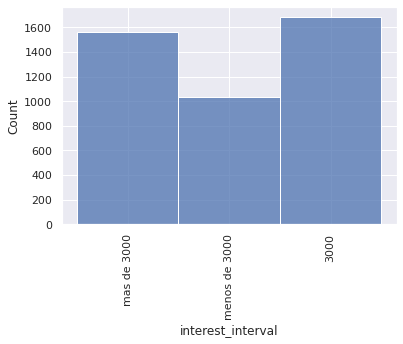

In [ ]:
sns.histplot(data = perf_train, x = "interest_interval")
plt.xticks(rotation = 'vertical')
plt.show()

**TERM DAYS**

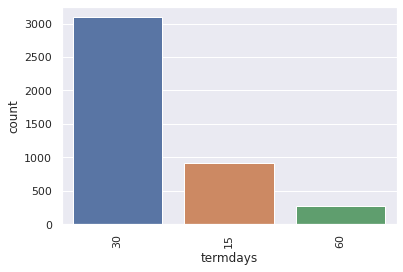

In [ ]:
sns.countplot(data = perf_train, x = "termdays", order=perf_train.termdays.value_counts().iloc[:5].index)
plt.xticks(rotation = 'vertical')
plt.show()

In [47]:
perf_train.loc[perf_train['termdays'] !=30,'termdays']='Other'

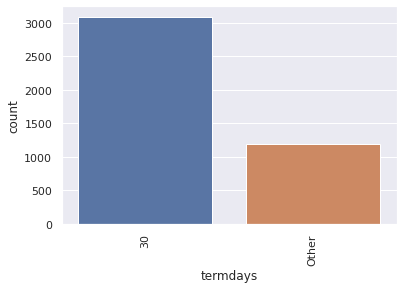

In [ ]:
sns.countplot(data = perf_train, x = "termdays")
plt.xticks(rotation = 'vertical')
plt.show()

**GOOD OR BAD**

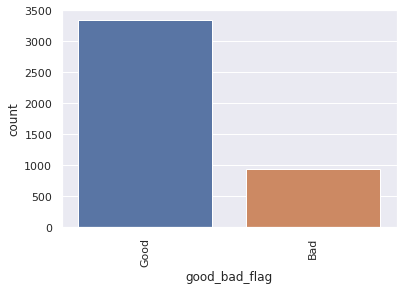

In [ ]:
sns.countplot(data = perf_train, x = "good_bad_flag")
plt.xticks(rotation = 'vertical')
plt.show()

### **Exportar csv modificado**

In [48]:
perf_train.to_csv('/content/test_performance_clean.csv', index = False)

## **Train Previous Loans**

In [49]:
#import csv
prevloan_train= pd.read_csv('/content/test_previous_loan.csv')
prevloan_train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,NaN,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,NaN,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000


### **Tipos de datos**

In [50]:
prevloan_train.dtypes

customerid          object
systemloanid         int64
loannumber           int64
approveddate        object
creationdate        object
loanamount         float64
totaldue           float64
termdays             int64
closeddate          object
referredby          object
firstduedate        object
firstrepaiddate     object
dtype: object

In [51]:
#Pasamos las variables de fechas que nos interesan a datetime

prevloan_train['firstduedate']=pd.to_datetime(prevloan_train['firstduedate'])
prevloan_train['firstrepaiddate']=pd.to_datetime(prevloan_train['firstrepaiddate'])
prevloan_train['approveddate']=pd.to_datetime(prevloan_train['approveddate'])
prevloan_train['closeddate']=pd.to_datetime(prevloan_train['closeddate'])

prevloan_train.dtypes

customerid                 object
systemloanid                int64
loannumber                  int64
approveddate       datetime64[ns]
creationdate               object
loanamount                float64
totaldue                  float64
termdays                    int64
closeddate         datetime64[ns]
referredby                 object
firstduedate       datetime64[ns]
firstrepaiddate    datetime64[ns]
dtype: object

### **Edición de variables**

#### **Añadimos variables transformadas**

In [52]:
#Calculamos el tiempo que pasa desde la fecha del primer pago hasta el pago real
prevloan_train.insert(12, 'payment_span_hours', '')

for i in prevloan_train.index:
  span = prevloan_train['firstrepaiddate'][i] - prevloan_train['firstduedate'][i]
  prevloan_train['payment_span_hours'][i]= span.components.hours

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [53]:
#Calculamos el tiempo que pasa desde la fecha de aprovación hasta el cierre oficial
prevloan_train.insert(13, 'active_span_days', '')

for i in prevloan_train.index:
  span = prevloan_train['closeddate'][i] - prevloan_train['approveddate'][i]
  prevloan_train['active_span_days'][i]= span.components.days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
#Calculamos el interés

prevloan_train.insert(14, 'interest', '')

for i in prevloan_train.index:
  interes = prevloan_train['totaldue'][i] - prevloan_train['loanamount'][i]
  prevloan_train['interest'][i]= interes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [55]:
prevloan_train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,payment_span_hours,active_span_days,interest
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15,NaN,2016-06-16,2016-06-16 15:44:08,15,30,3000.0
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58,NaN,2017-03-06,2017-03-02 16:07:47,16,25,6800.0
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24,NaN,2017-04-03,2017-04-01 21:29:46,21,28,4400.0
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04,NaN,2016-07-04,2016-07-04 11:19:01,11,31,3000.0
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58,NaN,2016-05-31,2016-06-01 15:22:34,15,16,1500.0


#### **Eliminamos variables innecesarias**

In [56]:
prevloan_train.isnull().sum()

customerid               0
systemloanid             0
loannumber               0
approveddate             0
creationdate             0
loanamount               0
totaldue                 0
termdays                 0
closeddate               0
referredby            5582
firstduedate             0
firstrepaiddate          0
payment_span_hours       0
active_span_days         0
interest                 0
dtype: int64

In [57]:
del prevloan_train['approveddate'] #usado para el active span
del prevloan_train['creationdate'] #consideramos que no es util por sí sola ni para calcular otras variables
del prevloan_train['totaldue'] #usado para el interes
del prevloan_train['closeddate'] #usado para el active span
del prevloan_train['referredby'] #demasiados valores nulos
del prevloan_train['firstduedate'] #usado para el payment span
del prevloan_train['firstrepaiddate'] #usado para el payment span

In [58]:
prevloan_train.head()

,customerid,systemloanid,loannumber,loanamount,termdays,payment_span_hours,active_span_days,interest
0,8a858899538ddb8e015390510b321f08,301621635,3,10000.0,30,15,30,3000.0
1,8a858959537a097401537a4e316e25f7,301810201,5,30000.0,60,16,25,6800.0
2,8a858959537a097401537a4e316e25f7,301831255,6,30000.0,30,21,28,4400.0
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,10000.0,30,11,31,3000.0
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,10000.0,15,15,16,1500.0


#### **Visualización y agrupación de variables**

**LOAN NUMBER**

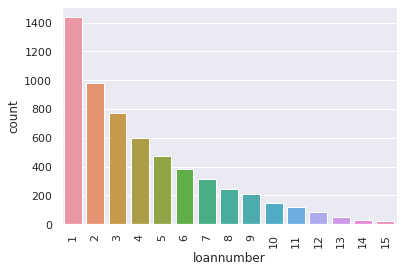

In [59]:
sns.countplot(data = prevloan_train, x = "loannumber", order=prevloan_train.loannumber.value_counts().iloc[:15].index)
plt.xticks(rotation = 'vertical')
plt.show()
#pendiente de revisar cuando eliminemos filas a raiz de otras variables

**LOAN AMOUNT**

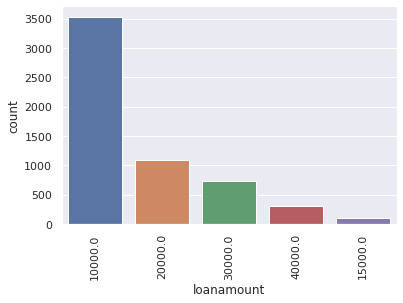

In [60]:
sns.countplot(data = prevloan_train, x = "loanamount",order=prevloan_train.loanamount.value_counts().iloc[:5].index)
plt.xticks(rotation = 'vertical')
plt.show()

In [61]:
prevloan_train.insert(7, 'loan_interval', '1')
prevloan_train['loan_interval'] = prevloan_train['loan_interval'].astype('int64')

In [62]:
#Reagruparemos la variable en dos grupos: 10000 u.m. y más de 10000 u.m.
bins = [0, 10000, 40000]
names = ["10000", "+10000"]
prevloan_train['loan_interval']= pd.cut(prevloan_train['loanamount'], bins, labels = names)

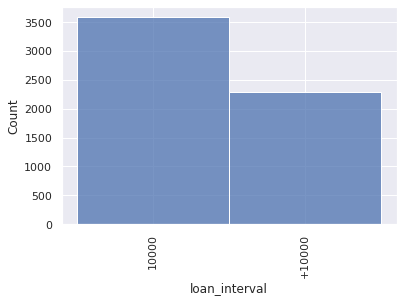

In [63]:
sns.histplot(data = prevloan_train, x = "loan_interval")
plt.xticks(rotation = 'vertical')
plt.show()

**INTEREST**

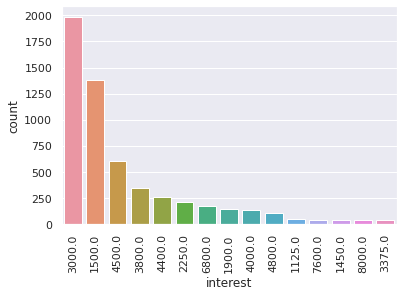

In [64]:
sns.countplot(data = prevloan_train, x = "interest", order=prevloan_train.interest.value_counts().iloc[:15].index)
plt.xticks(rotation = 'vertical')
plt.show()

In [65]:
prevloan_train.insert(8, 'interest_interval', '')

for i in prevloan_train.index:
  if prevloan_train['interest'][i] < 3000:
    prevloan_train['interest_interval'][i] = 'menos de 3000'
  if prevloan_train['interest'][i] > 3000:
    prevloan_train['interest_interval'][i] = 'mas de 3000'
  if prevloan_train['interest'][i] == 3000:
    prevloan_train['interest_interval'][i] = '3000'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


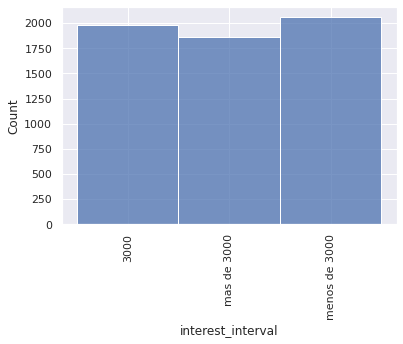

In [66]:
sns.histplot(data = prevloan_train, x = "interest_interval")
plt.xticks(rotation = 'vertical')
plt.show()

**TERM DAYS**

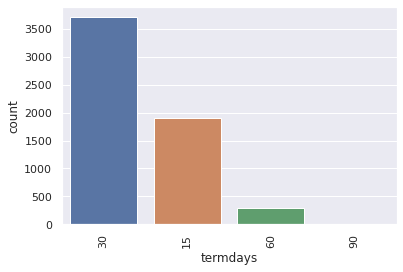

In [67]:
sns.countplot(data = prevloan_train, x = "termdays", order=prevloan_train.termdays.value_counts().iloc[:5].index)
plt.xticks(rotation = 'vertical')
plt.show()

In [68]:
prevloan_train.loc[prevloan_train['termdays'] !=30,'termdays']='Other'

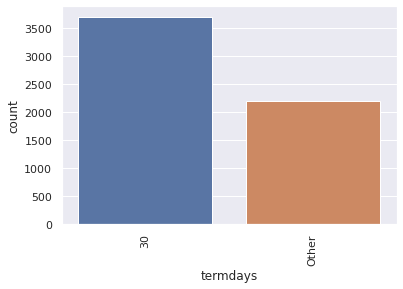

In [69]:
sns.countplot(data = prevloan_train, x = "termdays")
plt.xticks(rotation = 'vertical')
plt.show()

**PAYMENT SPAN**

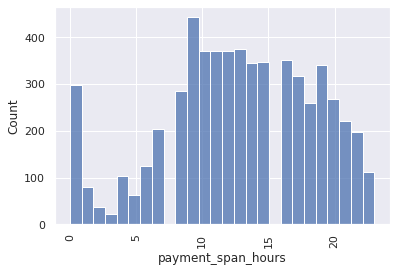

In [70]:
sns.histplot(data = prevloan_train, x = "payment_span_hours")
plt.xticks(rotation = 'vertical')
plt.show()

#como está bastante distribuida, no la vamos a tocar

**ACTIVE SPAN**

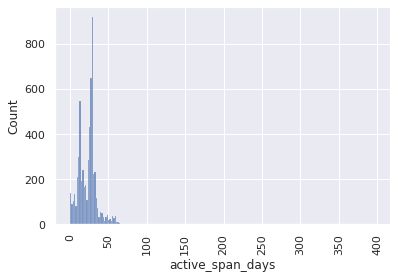

In [71]:
sns.histplot(data = prevloan_train, x = "active_span_days")
plt.xticks(rotation = 'vertical')
plt.show()

In [72]:
prevloan_train['active_span_days']=prevloan_train['active_span_days'].astype('int')
prevloan_train['active_span_days'].describe()

count    5907.000000
mean       23.820552
std        14.394364
min         0.000000
25%        14.000000
50%        25.000000
75%        30.000000
max       396.000000
Name: active_span_days, dtype: float64

In [73]:
#Eliminamos las filas que no nos aportan información porque son relativas a muy pocos casos

prevloan_train.drop(prevloan_train.loc[prevloan_train['active_span_days'] > 60].index, inplace=True)

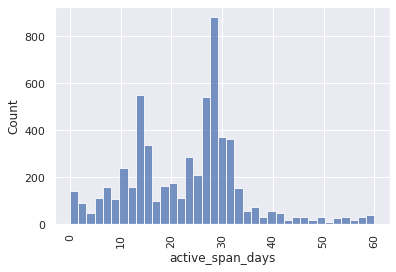

In [74]:
sns.histplot(data = prevloan_train, x = "active_span_days")
plt.xticks(rotation = 'vertical')
plt.show()

### **Exportar csv modificado**

In [75]:
prevloan_train.to_csv('/content/test_prevloan_clean.csv', index = False)